In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from google.colab import files

In [ ]:
# Uploading files
uploaded = files.upload()

In [3]:
!ls

sample_data  takehome_user_engagement.csv  takehome_users.csv


In [4]:
# Creating two data frames
user_details = pd.read_csv("takehome_users.csv", encoding = 'unicode_escape', engine ='python')
user_eng     = pd.read_csv("takehome_user_engagement.csv")

In [5]:
user_details.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


We can see, there are two columns "last_session_creation_time" and "invited_by_user_id" having several null values. However, the meaning of these two null-values are different.


*   "last_session_creation_time" null = missing data. These users didn't log in after creating their account. Here we can use creation time to replace them.
*   "invited_by_user_id"  null = the person joined individually. Here, we can replace them with a unique value, such as 0.



In [7]:
# Converting to proper datetime format
user_details["creation_time"]              = pd.to_datetime(
    user_details["creation_time"])
user_details['last_session_creation_time'] =  pd.to_datetime(
    user_details['last_session_creation_time'],unit='s')

In [8]:
user_details.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [9]:
# Checking the user engagement df
user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
user_eng.shape

(207917, 3)

In [11]:
# Number of unique users present
user_eng["user_id"].nunique()

8823

In [12]:
user_eng.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [13]:
# Converting the time_stamp to proper date time format
user_eng["time_stamp"] = pd.to_datetime(user_eng["time_stamp"])

In [14]:
user_eng.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [15]:
# Extracting dates from time_stamp
user_eng['Date'] = pd.to_datetime(user_eng.time_stamp.dt.date)

In [16]:
user_eng.head()

,time_stamp,user_id,visited,Date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [17]:
# As the same day visit is considered invalid
# I will first drop the time_stamp column and
# then will drop all duplicates
# this will remove all entries coming from the same day.
user_eng = user_eng.drop("time_stamp", axis=1)
user_eng = user_eng.drop_duplicates()

In [18]:
user_eng.head()

,user_id,visited,Date
0,1,1,2014-04-22
1,2,1,2013-11-15
2,2,1,2013-11-29
3,2,1,2013-12-09
4,2,1,2013-12-25


In [19]:
# Now I'm creating visits_7_days column
# with number of visits within a week
# This part of the code is obtained from the net
def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='Date')['user_id'].count()

user_eng['visits_7_days'] = user_eng.groupby('user_id', 
                                             as_index=False, 
                                             group_keys=False).apply(rolling_count, '7D')

In [20]:
user_eng.head(20)

,user_id,visited,Date,visits_7_days
0,1,1,2014-04-22,1.0
1,2,1,2013-11-15,1.0
2,2,1,2013-11-29,1.0
3,2,1,2013-12-09,1.0
4,2,1,2013-12-25,1.0
5,2,1,2013-12-31,2.0
6,2,1,2014-01-08,1.0
7,2,1,2014-02-03,1.0
8,2,1,2014-02-08,2.0
9,2,1,2014-02-09,3.0


In [21]:
# Now grouping by user_id and finding the max value
user_adopted = user_eng.groupby('user_id')['visits_7_days'].max().reset_index()
user_adopted.head()

,user_id,visits_7_days
0,1,1.0
1,2,3.0
2,3,1.0
3,4,1.0
4,5,1.0


In [22]:
# Now create a new column as "is_adopted"
user_adopted["is_adopted"] = (user_adopted["visits_7_days"]>2).astype(int)
user_adopted.head(10)

,user_id,visits_7_days,is_adopted
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0
5,6,1.0,0
6,7,1.0,0
7,10,7.0,1
8,11,1.0,0
9,13,1.0,0


In [23]:
user_adopted.shape

(8823, 3)

In [24]:
user_adopted["is_adopted"].value_counts()

0    7221
1    1602
Name: is_adopted, dtype: int64

In [25]:
# Now merge two dataframes to create a new data frame.
# How=left is used as we need to populate the user_details df with "is_adopted" column

df_merged = pd.merge(user_details,user_adopted, left_on="object_id", right_on="user_id", how="left")
df_merged.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visits_7_days,is_adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2.0,3.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,3.0,1.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,4.0,1.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.0,1.0,0.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,6.0,1.0,0.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,7.0,1.0,0.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,NaN,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,NaN,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,10.0,7.0,1.0


In [26]:
df_merged.shape

(12000, 13)

In [27]:
df_merged.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
user_id                       3177
visits_7_days                 3177
is_adopted                    3177
dtype: int64

In [28]:
# Filling "invited_by_user_id" with 0
# as these users were not invited by anyone.
df_merged["invited_by_user_id"].fillna(0, inplace=True)

In [29]:
# Last creation time are missing due to the fact that
# these users didn't log in after creating their account.
# So, I will replace them with the creation_time values.
df_merged["last_session_creation_time"].fillna(df_merged["creation_time"], inplace=True)

In [30]:
# Data for object_id 8 was missing earlier. Check if it was replaced properly
df_merged.iloc[7]

object_id                                              8
creation_time                        2013-07-31 05:34:02
name                                   Hamilton Danielle
email                         DanielleHamilton@yahoo.com
creation_source                        PERSONAL_PROJECTS
last_session_creation_time           2013-07-31 05:34:02
opted_in_to_mailing_list                               1
enabled_for_marketing_drip                             1
org_id                                                74
invited_by_user_id                                   0.0
user_id                                              NaN
visits_7_days                                        NaN
is_adopted                                           NaN
Name: 7, dtype: object

In [31]:
df_merged.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
user_id                       3177
visits_7_days                 3177
is_adopted                    3177
dtype: int64

In [32]:
# These 3177 users are those who did'nt log in after creating their account.
# So all of them are NOT ADOPTED.
# I will replace them with 0.
df_merged["is_adopted"].fillna(0, inplace=True)

In [33]:
df_merged.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
user_id                       3177
visits_7_days                 3177
is_adopted                       0
dtype: int64

In [34]:
# user_id and visits_7_days are redundant columns.
# I will drop these columns.
df_merged = df_merged.drop(["user_id","visits_7_days"], axis=1)

In [35]:
# Create a new feature called is_invited
# Assign it 1 if invited by someone else 0.
df_merged["is_invited"] = (df_merged["invited_by_user_id"]> 0).astype(int)

In [36]:
# Create a few more features from the present data set
df_merged["year"]           = df_merged["last_session_creation_time"].dt.year
df_merged["month"]          = df_merged["last_session_creation_time"].dt.month
df_merged["day"]            = df_merged["last_session_creation_time"].dt.day
df_merged["weekday"]        = df_merged["last_session_creation_time"].dt.weekday

df_merged["creation_year"]  = df_merged["creation_time"].dt.year
df_merged["creation_month"] = df_merged["creation_time"].dt.month
df_merged["creation_date"]  = df_merged["creation_time"].dt.day
df_merged["creation_day"]   = df_merged["creation_time"].dt.weekday

# Creating another feature as age.
# Priliminary expectation is: aged users will visit more frequently
df_merged["age"]            = (df_merged["last_session_creation_time"] - 
                              df_merged["creation_time"])/np.timedelta64(1, 'D')

In [37]:
df_merged.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'is_adopted', 'is_invited', 'year', 'month', 'day', 'weekday',
       'creation_year', 'creation_month', 'creation_date', 'creation_day',
       'age'],
      dtype='object')

In [38]:
# Removing redundant features
df_merged = df_merged.drop(['last_session_creation_time','object_id', 
                            'creation_time', 'name', 'email'], axis=1)

In [39]:
# This is my final dataframe
df_merged.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted,is_invited,year,month,day,weekday,creation_year,creation_month,creation_date,creation_day,age
0,GUEST_INVITE,1,0,11,10803.0,0.0,1,2014,4,22,1,2014,4,22,1,0.0
1,ORG_INVITE,0,0,1,316.0,1.0,1,2014,3,31,0,2013,11,15,4,136.0
2,ORG_INVITE,0,0,94,1525.0,0.0,1,2013,3,19,1,2013,3,19,1,0.0
3,GUEST_INVITE,0,0,1,5151.0,0.0,1,2013,5,22,2,2013,5,21,1,1.0
4,GUEST_INVITE,0,0,193,5240.0,0.0,1,2013,1,22,1,2013,1,17,3,5.0


In [40]:
df_merged.shape

(12000, 16)

In [41]:
df_merged.dtypes

creation_source                object
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
is_adopted                    float64
is_invited                      int64
year                            int64
month                           int64
day                             int64
weekday                         int64
creation_year                   int64
creation_month                  int64
creation_date                   int64
creation_day                    int64
age                           float64
dtype: object

In [42]:
df_merged["invited_by_user_id"].nunique()

2565

In [43]:
# To use "invited_by_user_id" categorical variable, I have to label encode it.
# One hot encoding is not a feasible option here.

In [44]:
df_merged["org_id"].nunique()

417

In [45]:
# Again I have to use label encoding instead of one hot encoding.

In [46]:
df_merged["opted_in_to_mailing_list"].nunique()

2

In [47]:
# Checking whether balanced or imbalanced
df_merged["is_adopted"].value_counts(normalize=True)*100

0.0    86.65
1.0    13.35
Name: is_adopted, dtype: float64

In [48]:
# Only 13.35% data belongs to the class 1 and the rest is class 0
# The dataset is highly imbalanced and we have to take care of it.
# Here I will use SMOTE technique to oversample the dataset.

In [49]:
# Understanding How many of the signed up users are actually adopted user
group_sum   = df_merged.groupby(by="creation_source").sum()["is_adopted"]
group_count =df_merged.groupby(by="creation_source").count()["is_adopted"]

group_sum/group_count

creation_source
GUEST_INVITE          0.166436
ORG_INVITE            0.129995
PERSONAL_PROJECTS     0.077688
SIGNUP                0.140393
SIGNUP_GOOGLE_AUTH    0.167509
Name: is_adopted, dtype: float64

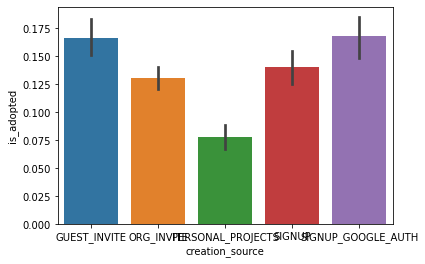

In [50]:
# Visualising the same with a barplot
sns.barplot(x="creation_source", y="is_adopted", data= df_merged , order= group_sum.index);

In [51]:
# Those who are invited by guests, or those who joined using google authorization are usually more adopted.

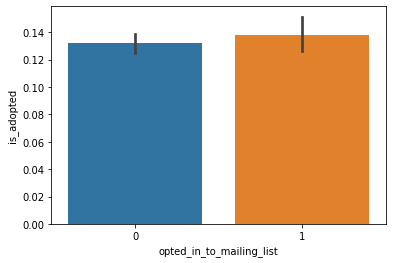

In [52]:
sns.barplot(x="opted_in_to_mailing_list", y="is_adopted", data= df_merged);

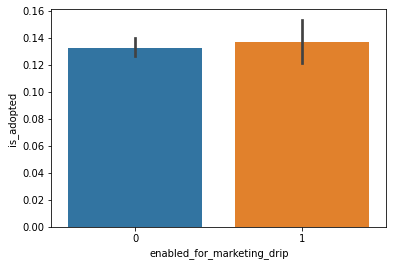

In [53]:
sns.barplot(x="enabled_for_marketing_drip", y="is_adopted", data= df_merged);

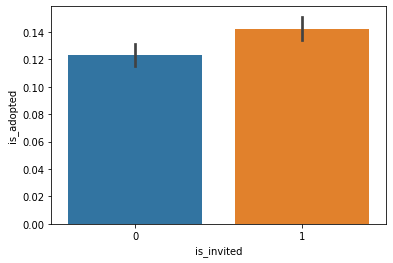

In [55]:
sns.barplot(x="is_invited", y="is_adopted", data= df_merged);

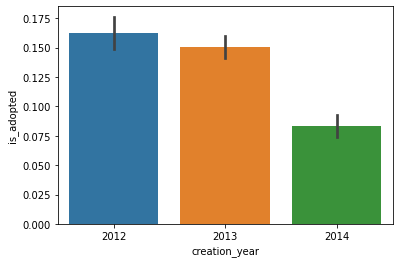

In [57]:
sns.barplot(x="creation_year", y="is_adopted", data= df_merged);

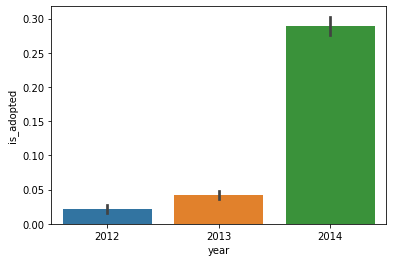

In [58]:
sns.barplot(x="year", y="is_adopted", data= df_merged);

In [60]:
df_merged.groupby(by="is_adopted").mean()["age"]

is_adopted
0.0      4.000289
1.0    300.200999
Name: age, dtype: float64

In [ ]:
# Performing one hot encoding
df_merged = pd.get_dummies(data=df_merged, columns=["creation_source"])

In [ ]:
df_merged.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted,is_invited,year,month,day,weekday,creation_year,creation_month,creation_date,creation_day,age,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,0.0,1,2014,4,22,1,2014,4,22,1,0.0,1,0,0,0,0
1,0,0,1,316.0,1.0,1,2014,3,31,0,2013,11,15,4,136.0,0,1,0,0,0
2,0,0,94,1525.0,0.0,1,2013,3,19,1,2013,3,19,1,0.0,0,1,0,0,0
3,0,0,1,5151.0,0.0,1,2013,5,22,2,2013,5,21,1,1.0,1,0,0,0,0
4,0,0,193,5240.0,0.0,1,2013,1,22,1,2013,1,17,3,5.0,1,0,0,0,0


# Model

In [ ]:
# Define Features and Target
X = df_merged.drop(["is_adopted","invited_by_user_id"], axis=1)
y = df_merged["is_adopted"]
X.shape, y.shape

((12000, 18), (12000,))

In [ ]:
# Splitting into train-test groups
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25, random_state=42)

X_train.shape, X_test.shape

((9000, 18), (3000, 18))

In [ ]:
# Over sampling using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=0)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
# DT Model Hyper Parameter Optimization
for depth in range(1,20,1):
  model = DecisionTreeClassifier(max_depth = depth, random_state=0)
  model.fit(X_sm, y_sm)
  y_pred = model.predict(X_test)

  print("Max Depth:",depth, "Train AUROC:", round(roc_auc_score(y_train, model.predict(X_train)),4),
        "Test  AUROC:", round(roc_auc_score(y_test, y_pred),4))

Max Depth: 1 Train AUROC: 0.9598 Test  AUROC: 0.9627
Max Depth: 2 Train AUROC: 0.9598 Test  AUROC: 0.9627
Max Depth: 3 Train AUROC: 0.957 Test  AUROC: 0.965
Max Depth: 4 Train AUROC: 0.9568 Test  AUROC: 0.9607
Max Depth: 5 Train AUROC: 0.9565 Test  AUROC: 0.9619
Max Depth: 6 Train AUROC: 0.9624 Test  AUROC: 0.9561
Max Depth: 7 Train AUROC: 0.964 Test  AUROC: 0.9552
Max Depth: 8 Train AUROC: 0.9727 Test  AUROC: 0.9506
Max Depth: 9 Train AUROC: 0.9754 Test  AUROC: 0.9479
Max Depth: 10 Train AUROC: 0.9842 Test  AUROC: 0.9429
Max Depth: 11 Train AUROC: 0.9904 Test  AUROC: 0.9341
Max Depth: 12 Train AUROC: 0.9937 Test  AUROC: 0.9328
Max Depth: 13 Train AUROC: 0.9951 Test  AUROC: 0.9314
Max Depth: 14 Train AUROC: 0.9976 Test  AUROC: 0.9336
Max Depth: 15 Train AUROC: 0.9987 Test  AUROC: 0.9357
Max Depth: 16 Train AUROC: 0.9986 Test  AUROC: 0.9336
Max Depth: 17 Train AUROC: 0.9989 Test  AUROC: 0.9364
Max Depth: 18 Train AUROC: 0.9995 Test  AUROC: 0.9338
Max Depth: 19 Train AUROC: 1.0 Test  AUR

In [ ]:
# As it seems, max_depth = 3 is one of the best hyper parameters.
model = DecisionTreeClassifier(max_depth = 5, random_state=0)
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test)
print("AUROC Score:",round(roc_auc_score(y_test, y_pred),4))

AUROC Score: 0.9619


In [ ]:
# Confusion Matrix
pd.crosstab(y_pred, y_test, normalize="columns")

is_adopted,0.0,1.0
row_0,,
0.0,0.95565,0.031941
1.0,0.04435,0.968059


In [ ]:
# Observation: For both the classes, Recall value is very good. 
#              We are interested to predict the Class 1.
#              Corresponding recall value is 0.968.
#              Our model is capable enough to classify properly.

In [ ]:
# Feature Importances
feature = []
for i in range(len(model.feature_importances_)):
  feature.append([round(model.feature_importances_[i],4),model.feature_names_in_[i]])
sorted(feature, reverse=True)

[[0.9745, 'age'],
 [0.0047, 'creation_day'],
 [0.0042, 'creation_source_SIGNUP'],
 [0.0041, 'opted_in_to_mailing_list'],
 [0.0032, 'is_invited'],
 [0.003, 'creation_date'],
 [0.0026, 'creation_source_PERSONAL_PROJECTS'],
 [0.0012, 'creation_source_ORG_INVITE'],
 [0.0008, 'weekday'],
 [0.0007, 'day'],
 [0.0007, 'creation_month'],
 [0.0002, 'org_id'],
 [0.0, 'year'],
 [0.0, 'month'],
 [0.0, 'enabled_for_marketing_drip'],
 [0.0, 'creation_year'],
 [0.0, 'creation_source_SIGNUP_GOOGLE_AUTH'],
 [0.0, 'creation_source_GUEST_INVITE']]

In [ ]:
# Question to Kousik:

Model 1: SMOTE + age; AUROC =.965, Recall High but Precission; Accuracy Low

Model 2: SMOTE; AUROC = .94, Recall, Precission; Accuracy are both High

Which model to choose?
My answer: Model 1 should be used here as we are interested in predicting the Class 1 (adopted) properly.

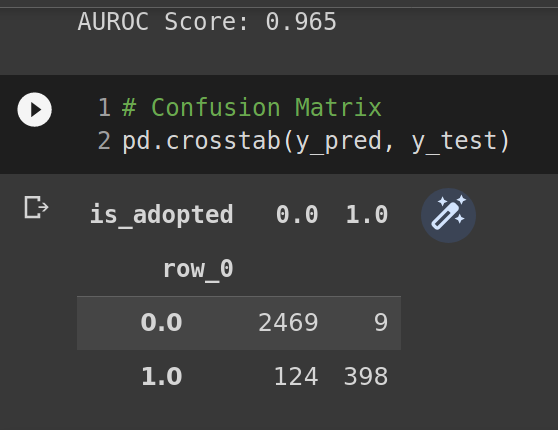

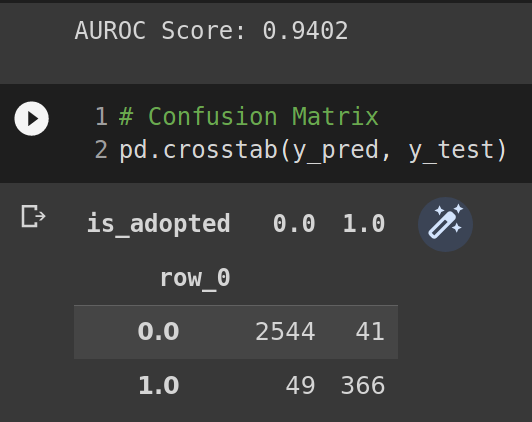